In [1]:
import json
import re 
import copy
import graphviz

from importlib import reload

In [2]:
import sys
import clingo
import clingo.symbol as symbol

In [3]:
# This is a hack to make the library in the parent folder available for imoprts
# A better solution is by np8 here:
# https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder
import sys
import os
import inspect

thisdir = sys.path[0]
print(f"thisdir = {thisdir}")
parentdir = os.path.dirname(thisdir)
#print(f"parentdir = {parentdir}")
if not parentdir in sys.path:
    print("Adding parent directory to python path")
    sys.path.insert(1, parentdir)
else:
    print("Skipping adding parent direct to path (there already)")

print(f"sys.path =\n{sys.path}")


thisdir = /home/luke/git/external/asp_recipe_graphs/notebooks
Adding parent directory to python path
sys.path =
['/home/luke/git/external/asp_recipe_graphs/notebooks', '/home/luke/git/external/asp_recipe_graphs', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/luke/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.10/dist-packages']


In [4]:
## local modules
os.environ["GRASP_SRC_DIR"] = '..'

import asp_recipe_graphs.api.modules
reload(asp_recipe_graphs.api.modules)

from asp_recipe_graphs.api.modules import MODULES
from asp_recipe_graphs.api.modules import RE_FIND_TERMS
from asp_recipe_graphs.api.modules import RE_IS_DEFINITION
from asp_recipe_graphs.api.modules import ASP_MODULE_DEFINES
from asp_recipe_graphs.api.modules import ASP_MODULE_USES
from asp_recipe_graphs.api.modules import DEPENDENCY_MAP
from asp_recipe_graphs.api.modules import ALL_DEFINED
from asp_recipe_graphs.api.modules import ALL_USES
from asp_recipe_graphs.api.modules import UNDEFINED_TERMS
from asp_recipe_graphs.api.modules import get_dependencies
from asp_recipe_graphs.api.modules import what_defines
from asp_recipe_graphs.api.modules import what_uses

universal_types: ['child("put", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child("mix", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child("fry", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child("boil", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child("chop", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child("bake", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child("blend", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child("rinse", "action").\n']
	def_term_matches = ['child']
	RE_IS_DEFINITION.findall(line) = ['child']
universal_types: ['child(

## Modules

There are a number of asp modules, which define and use terms, and these are subject to change. The python module `asp_recipe_graphs.asp.modules` provides functionality that interrogates these modules and gives information on this. In particular, there is information on which modules define and use which terms, which modules directly depend on other modules, and getting a full dependency chain for a given module or set of modules.

In [5]:
print(f"asp_module_defines = {ASP_MODULE_DEFINES}")
print()
print("Uses")
for m, uses in ASP_MODULE_USES.items():
    print(f"\t{m} uses {uses}")
print()
print(f"undefined_terms = {UNDEFINED_TERMS}")
print()

asp_module_defines = {'acceptability': {'acceptable_recipe'}, 'composition': {'incompatible_node_types', 'composable', 'empty_intersection'}, 'equivalence': {'equivalent'}, 'granularity': {'finer_grained', 'more_specific', 'mapped_to_by_g_function', 'path_or_equal', 'not_same_recipe'}, 'graph_properties': {'connected', 'graph', 'cyclic', 'has_incoming_arc', 'is_node', 'connected_in', 'path', 'has_outgoing_arc'}, 'in_out_aligned': {'in_out_aligned'}, 'isomorphisms': {'isomorphic'}, 'recipe_graphs': {'atomic_recipe_graph', 'graph', 'strict_subrecipe_graph', 'high_indexes_allowed', 'given_recipe_graph', 'recipe_graph', 'recipe', 'subrecipe_graph_of'}, 'subrecipes': {'subrecipe_of'}, 'type_hierarchies': {'action_type', 'same_type_path', 'comestible_type', 'subtype_or_equal', 'subtype'}, 'universal_types': {'child'}}

Uses
	acceptability uses {'in', 'arcs', 'type_of', 'acceptability_tuple', 'a', 'arc', 'recipe', 'c'}
	composition uses {'in', 'type_of', 'join_types_match', 'nodes', 'recipe_g

In [6]:
# MODULES tells us what modules are defined (domain independent)
MODULES

['acceptability',
 'composition',
 'equivalence',
 'granularity',
 'graph_properties',
 'in_out_aligned',
 'isomorphisms',
 'recipe_graphs',
 'subrecipes',
 'type_hierarchies',
 'universal_types']

In [7]:
# all terms that have been defined in at least one module,
print(f"ALL_DEFINED = {ALL_DEFINED}", end='\n\n')
# all terms that are used in at least one module
print(f"ALL_USES = {ALL_USES}", end='\n\n')
# all terms that are used but not defined
print(f"UNDEFINED_TERMS = {UNDEFINED_TERMS}")


ALL_DEFINED = {'connected', 'isomorphic', 'in_out_aligned', 'has_outgoing_arc', 'recipe_graph', 'equivalent', 'subtype_or_equal', 'subrecipe_of', 'subtype', 'graph', 'atomic_recipe_graph', 'high_indexes_allowed', 'same_type_path', 'path', 'incompatible_node_types', 'subrecipe_graph_of', 'has_incoming_arc', 'given_recipe_graph', 'composable', 'path_or_equal', 'recipe', 'action_type', 'not_same_recipe', 'empty_intersection', 'strict_subrecipe_graph', 'cyclic', 'finer_grained', 'more_specific', 'is_node', 'comestible_type', 'mapped_to_by_g_function', 'connected_in', 'acceptable_recipe', 'child'}

ALL_USES = {'in', 'connected', 'join_types_match', 'isomorphic', 'empty', 'is_arc', 'nodes', 'in_out_aligned', 'a_nodes', 'recipe_graph', 'mid', 'c_nodes', 'c', 'in_types', 'subtype_or_equal', 'path_with_half_length', 'a_node_properly_connected', 'composition', 'g_function', 'arcs', 'same_type_path', 'one_path_longer', 'number_of_action_nodes', 'path', 'given_recipe', 'numbered_mixture', 'a_node_

In [8]:
# what_defines(...) asks what module defines a given term 
# (if more than one module defines a term it returns the first module detected)
what_defines('child')

'universal_types'

In [9]:
RE_FIND_TERMS = re.compile('(?:([a-z][a-z_]*)\([a-zA-Z_,()]*\))')
RE_FIND_TERMS = re.compile('(?=(?:^|\W|\(|\))([a-z][a-z_]*)\([a-zA-Z][a-zA-Z0-9_,()]*\))')

line = 'subtype(Ts,T) :- child(Ts,T).'
line = '    recipe(RG1,TF1),'
RE_FIND_TERMS.findall(line)

['recipe']

In [10]:
RE_IS_DEFINITION = re.compile('^([a-z][a-z_]*)\([a-zA-Z0-9_," ]*\)(?: :-|.)')
RE_IS_DEFINITION = re.compile('^([a-z][a-z_]*)\([a-zA-Z0-9_," ]*\)(?: :-|\.)')

line = 'subtype(Ts,T) :- child(Ts,T).'
line = '    child(C,C1), '
line = 'subtype(Ts,T) :- child(Ts,T).'
line = 'child(C,C1), '
RE_IS_DEFINITION.findall(line)

[]

In [11]:
# what_uses(...) asks what modules use a given term.
what_uses('child')

['type_hierarchies']

In [12]:
# DEPENDENCY_MAP map shows the direct dependencies between modules. 
print(f"dependency_map = {DEPENDENCY_MAP}")

dependency_map = {'acceptability': {'recipe_graphs'}, 'composition': {'recipe_graphs', 'type_hierarchies'}, 'equivalence': {'recipe_graphs', 'isomorphisms'}, 'granularity': {'graph_properties', 'in_out_aligned', 'type_hierarchies', 'isomorphisms', 'recipe_graphs'}, 'graph_properties': set(), 'in_out_aligned': {'recipe_graphs'}, 'isomorphisms': {'recipe_graphs'}, 'recipe_graphs': {'graph_properties', 'type_hierarchies'}, 'subrecipes': {'recipe_graphs'}, 'type_hierarchies': {'universal_types'}, 'universal_types': set()}


i,k : (0, 'acceptability')
i,k : (1, 'composition')
i,k : (2, 'equivalence')
i,k : (3, 'granularity')
i,k : (4, 'graph_properties')
i,k : (5, 'in_out_aligned')
i,k : (6, 'isomorphisms')
i,k : (7, 'recipe_graphs')
i,k : (8, 'subrecipes')
i,k : (9, 'type_hierarchies')
i,k : (10, 'universal_types')


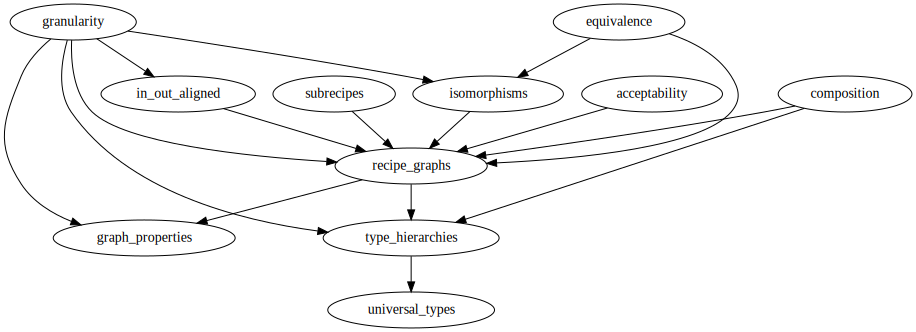

In [13]:
def create_dependency_graph(dependency_map):
    dot = graphviz.Digraph()
    node_ids = {}
    for i,k in enumerate(dependency_map.keys()):
        print(f"i,k : {i,k}")
        node_ids[k] = 'n'+str(i)
#         dot.node(i, label=k, style='filled', color='yellow', shape='box')
        dot.node(k, label=k)
    for source, targets in dependency_map.items():
#         sid = node_ids[source]
        for target in targets:
#             tid = node_ids[target]
            dot.edge(source,target)
    return dot
create_dependency_graph(DEPENDENCY_MAP)

In [14]:
# get_dependencies(...) resolves the full chain of dependencies for one or more modules.
specified = ['acceptability']
get_dependencies(specified)


{'acceptability',
 'graph_properties',
 'recipe_graphs',
 'type_hierarchies',
 'universal_types'}

## Graphs (unlabelled)

In [15]:
asp_model = 'in(arcs(rg_hummus),arc(c(0),a(0))) in(arcs(rg_hummus),arc(a(0),c(6))) in(arcs(rg_hummus),arc(c(1),a(1))) in(arcs(rg_hummus),arc(c(2),a(1))) in(arcs(rg_hummus),arc(c(3),a(1))) in(arcs(rg_hummus),arc(c(4),a(1))) in(arcs(rg_hummus),arc(c(5),a(1))) in(arcs(rg_hummus),arc(c(6),a(1))) in(arcs(rg_hummus),arc(a(1),c(8))) in(arcs(rg_hummus),arc(c(7),a(2))) in(arcs(rg_hummus),arc(a(2),c(9))) in(arcs(rg_hummus),arc(c(8),a(3))) in(arcs(rg_hummus),arc(c(9),a(3))) in(arcs(rg_hummus),arc(a(3),c(10))) in(a_nodes(rg_hummus),a(0)) in(a_nodes(rg_hummus),a(1)) in(a_nodes(rg_hummus),a(2)) in(a_nodes(rg_hummus),a(3)) in(c_nodes(rg_hummus),c(0)) in(c_nodes(rg_hummus),c(1)) in(c_nodes(rg_hummus),c(2)) in(c_nodes(rg_hummus),c(3)) in(c_nodes(rg_hummus),c(4)) in(c_nodes(rg_hummus),c(5)) in(c_nodes(rg_hummus),c(6)) in(c_nodes(rg_hummus),c(7)) in(c_nodes(rg_hummus),c(8)) in(c_nodes(rg_hummus),c(9)) in(c_nodes(rg_hummus),c(10)) in(nodes(rg_hummus),a(0)) in(nodes(rg_hummus),a(1)) in(nodes(rg_hummus),a(2)) in(nodes(rg_hummus),a(3)) in(nodes(rg_hummus),c(0)) in(nodes(rg_hummus),c(1)) in(nodes(rg_hummus),c(2)) in(nodes(rg_hummus),c(3)) in(nodes(rg_hummus),c(4)) in(nodes(rg_hummus),c(5)) in(nodes(rg_hummus),c(6)) in(nodes(rg_hummus),c(7)) in(nodes(rg_hummus),c(8)) in(nodes(rg_hummus),c(9)) in(nodes(rg_hummus),c(10))'
asp_model = 'in(arcs(rg_cannellini_hummus),arc(c(0),a(0))) in(arcs(rg_cannellini_hummus),arc(c(1),a(0))) in(arcs(rg_cannellini_hummus),arc(c(2),a(0))) in(arcs(rg_cannellini_hummus),arc(a(0),c(3))) in(arcs(rg_cannellini_hummus),arc(c(4),a(1))) in(arcs(rg_cannellini_hummus),arc(a(1),c(5))) in(arcs(rg_cannellini_hummus),arc(c(6),a(2))) in(arcs(rg_cannellini_hummus),arc(a(2),c(7))) in(arcs(rg_cannellini_hummus),arc(c(8),a(3))) in(arcs(rg_cannellini_hummus),arc(a(3),c(9))) in(arcs(rg_cannellini_hummus),arc(c(10),a(5))) in(arcs(rg_cannellini_hummus),arc(a(5),c(11))) in(arcs(rg_cannellini_hummus),arc(c(12),a(6))) in(arcs(rg_cannellini_hummus),arc(a(6),c(13))) in(arcs(rg_cannellini_hummus),arc(c(5),a(7))) in(arcs(rg_cannellini_hummus),arc(c(7),a(7))) in(arcs(rg_cannellini_hummus),arc(c(9),a(7))) in(arcs(rg_cannellini_hummus),arc(c(13),a(7))) in(arcs(rg_cannellini_hummus),arc(a(7),c(14))) in(arcs(rg_cannellini_hummus),arc(c(3),a(8))) in(arcs(rg_cannellini_hummus),arc(c(14),a(8))) in(arcs(rg_cannellini_hummus),arc(a(8),c(15))) in(arcs(rg_cannellini_hummus),arc(c(8),a(9))) in(arcs(rg_cannellini_hummus),arc(a(9),c(9))) in(arcs(rg_cannellini_hummus),arc(c(3),a(7))) in(arcs(rg_cannellini_hummus),arc(c(14),a(7))) in(arcs(rg_cannellini_hummus),arc(a(7),c(15))) in(a_nodes(rg_cannellini_hummus),a(0)) in(a_nodes(rg_cannellini_hummus),a(1)) in(a_nodes(rg_cannellini_hummus),a(2)) in(a_nodes(rg_cannellini_hummus),a(3)) in(a_nodes(rg_cannellini_hummus),a(5)) in(a_nodes(rg_cannellini_hummus),a(6)) in(a_nodes(rg_cannellini_hummus),a(7)) in(a_nodes(rg_cannellini_hummus),a(8)) in(a_nodes(rg_cannellini_hummus),a(9)) in(c_nodes(rg_cannellini_hummus),c(0)) in(c_nodes(rg_cannellini_hummus),c(1)) in(c_nodes(rg_cannellini_hummus),c(2)) in(c_nodes(rg_cannellini_hummus),c(4)) in(c_nodes(rg_cannellini_hummus),c(6)) in(c_nodes(rg_cannellini_hummus),c(8)) in(c_nodes(rg_cannellini_hummus),c(10)) in(c_nodes(rg_cannellini_hummus),c(12)) in(c_nodes(rg_cannellini_hummus),c(5)) in(c_nodes(rg_cannellini_hummus),c(7)) in(c_nodes(rg_cannellini_hummus),c(9)) in(c_nodes(rg_cannellini_hummus),c(13)) in(c_nodes(rg_cannellini_hummus),c(3)) in(c_nodes(rg_cannellini_hummus),c(14)) in(c_nodes(rg_cannellini_hummus),c(11)) in(c_nodes(rg_cannellini_hummus),c(15)) in(nodes(rg_cannellini_hummus),a(0)) in(nodes(rg_cannellini_hummus),a(1)) in(nodes(rg_cannellini_hummus),a(2)) in(nodes(rg_cannellini_hummus),a(3)) in(nodes(rg_cannellini_hummus),a(5)) in(nodes(rg_cannellini_hummus),a(6)) in(nodes(rg_cannellini_hummus),a(7)) in(nodes(rg_cannellini_hummus),a(8)) in(nodes(rg_cannellini_hummus),a(9)) in(nodes(rg_cannellini_hummus),c(0)) in(nodes(rg_cannellini_hummus),c(1)) in(nodes(rg_cannellini_hummus),c(2)) in(nodes(rg_cannellini_hummus),c(4)) in(nodes(rg_cannellini_hummus),c(6)) in(nodes(rg_cannellini_hummus),c(8)) in(nodes(rg_cannellini_hummus),c(10)) in(nodes(rg_cannellini_hummus),c(12)) in(nodes(rg_cannellini_hummus),c(5)) in(nodes(rg_cannellini_hummus),c(7)) in(nodes(rg_cannellini_hummus),c(9)) in(nodes(rg_cannellini_hummus),c(13)) in(nodes(rg_cannellini_hummus),c(3)) in(nodes(rg_cannellini_hummus),c(14)) in(nodes(rg_cannellini_hummus),c(11)) in(nodes(rg_cannellini_hummus),c(15))'

In [16]:
RES_C_OR_A = '(?:c|a)\([0-9]+\)'
RES_FIND_ARC = fr'arc\(({RES_C_OR_A}),({RES_C_OR_A})\)'
RES_FIND_ARCS_GRAPH = fr'arcs\(([a-zA-Z][a-zA-Z_]*)\)'
# RE_FIND_ARCS = re.compile(fr'(?:^|\s)in\({RES_FIND_ARCS_GRAPH},{RES_FIND_ARC}\)')
RE_FIND_ARCS = re.compile(fr'(?:^|\s)in\(arcs\(([a-z][a-z_]*)\),{RES_FIND_ARC}\)')
RE_RMV_BRCK = re.compile('(\(|\))')
# RE_FIND_ARCS = re.compile(fr'(?:^|\W)in\(arcs\(([a-z][a-z_]*)\)')
def remove_brackets(str_):
    return str_.replace('(','').replace(')','')

def get_graphs(asp_model):
    graphs = {}
    for gid, source, target in RE_FIND_ARCS.findall(asp_model):
        source = remove_brackets(source)
        target = remove_brackets(target)
        type_ = source[0]+target[0]
        graph_arcs = graphs.get(gid, list())
        graph_arcs.append({'type_':type_,'source':source,'target':target})
        graphs[gid] = graph_arcs
    return graphs
graphs = get_graphs(asp_model)
graphs

{'rg_cannellini_hummus': [{'type_': 'ca', 'source': 'c0', 'target': 'a0'},
  {'type_': 'ca', 'source': 'c1', 'target': 'a0'},
  {'type_': 'ca', 'source': 'c2', 'target': 'a0'},
  {'type_': 'ac', 'source': 'a0', 'target': 'c3'},
  {'type_': 'ca', 'source': 'c4', 'target': 'a1'},
  {'type_': 'ac', 'source': 'a1', 'target': 'c5'},
  {'type_': 'ca', 'source': 'c6', 'target': 'a2'},
  {'type_': 'ac', 'source': 'a2', 'target': 'c7'},
  {'type_': 'ca', 'source': 'c8', 'target': 'a3'},
  {'type_': 'ac', 'source': 'a3', 'target': 'c9'},
  {'type_': 'ca', 'source': 'c10', 'target': 'a5'},
  {'type_': 'ac', 'source': 'a5', 'target': 'c11'},
  {'type_': 'ca', 'source': 'c12', 'target': 'a6'},
  {'type_': 'ac', 'source': 'a6', 'target': 'c13'},
  {'type_': 'ca', 'source': 'c5', 'target': 'a7'},
  {'type_': 'ca', 'source': 'c7', 'target': 'a7'},
  {'type_': 'ca', 'source': 'c9', 'target': 'a7'},
  {'type_': 'ca', 'source': 'c13', 'target': 'a7'},
  {'type_': 'ac', 'source': 'a7', 'target': 'c14'},
 

In [17]:
def extract_nodes_from_typed_arcs(typed_arcs):
    nodes = {}
    for arc_desc in typed_arcs:
        type_ = arc_desc['type_']
        source = arc_desc['source']
        target = arc_desc['target']
        nodes[source] = {'type_': type_[0], 'str_': str(source)}
        nodes[target] = {'type_': type_[1], 'str_': str(target)}
    return nodes

def typed_arcs_to_dot(typed_arcs):
    nodes = extract_nodes_from_typed_arcs(typed_arcs)
    dot = graph_to_dot(nodes, typed_arcs)
    return dot

def graph_to_dot(nodes, arcs):
    dot = graphviz.Digraph()
    for n, node_desc in nodes.items():
        node_type = node_desc['type_']
        node_str = node_desc['str_']
        if node_type =='a':
            dot.node(n, label=node_str, style='filled', color='yellow', shape='box')
        elif node_type =='c':
            dot.node(n, label=node_str, style='filled', color='gray', shape='oval')
    for arc_desc in arcs:
        source = arc_desc['source']
        target = arc_desc['target']
        dot.edge(source, target)
    return dot

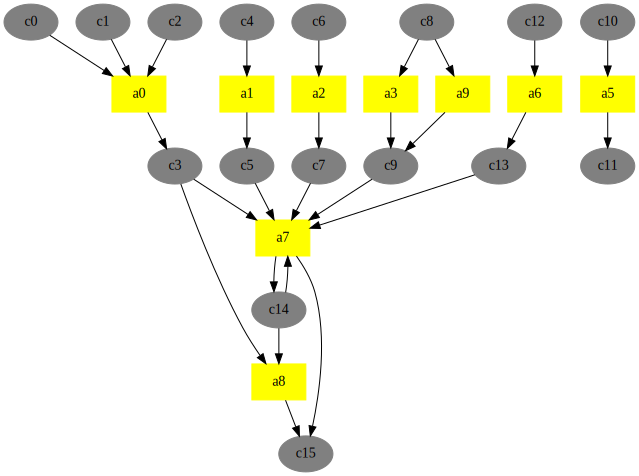

In [18]:
#dot = typed_arcs_to_dot(graphs['rg_hummus'])
dot = typed_arcs_to_dot(graphs['rg_cannellini_hummus'])
dot

## Types


In [19]:
asp_model = 'type_of(tf_hummus,c(0),"whole garlic") type_of(tf_hummus,c(1),"tahini") type_of(tf_hummus,c(2),"salt") type_of(tf_hummus,c(3),"lemon juice") type_of(tf_hummus,c(4),"olive oil") type_of(tf_hummus,c(5),"water") type_of(tf_hummus,c(6),"diced garlic") type_of(tf_hummus,c(7),"tinned chick peas") type_of(tf_hummus,c(8),"tahini mixture") type_of(tf_hummus,c(9),"rinsed chick peas") type_of(tf_hummus,c(10),"hummus") type_of(tf_hummus,a(0),"dice") type_of(tf_hummus,a(1),"blend until uniform") type_of(tf_hummus,a(2),"rinse and drain") type_of(tf_hummus,a(3),"blend together")'


In [20]:
RES_VAR_OR_CONST = '[a-zA-Z][a-zA-Z_]*'
RES_STRING = '"[a-zA-Z ]+"'
RES_FIND_TYPE_OF = fr'arc\(({RES_C_OR_A}),({RES_C_OR_A})\)'
RES_FIND_ARCS_GRAPH = fr'arcs\(([a-zA-Z][a-zA-Z_]*)\)'
# RE_FIND_ARCS = re.compile(fr'(?:^|\s)in\({RES_FIND_ARCS_GRAPH},{RES_FIND_ARC}\)')
RE_FIND_TYPE_OF = re.compile(fr'(?:^|\s)type_of\(({RES_VAR_OR_CONST}),({RES_C_OR_A}),({RES_STRING})\)')
RE_FIND_TYPE_OF.findall(asp_model)

[('tf_hummus', 'c(0)', '"whole garlic"'),
 ('tf_hummus', 'c(1)', '"tahini"'),
 ('tf_hummus', 'c(2)', '"salt"'),
 ('tf_hummus', 'c(3)', '"lemon juice"'),
 ('tf_hummus', 'c(4)', '"olive oil"'),
 ('tf_hummus', 'c(5)', '"water"'),
 ('tf_hummus', 'c(6)', '"diced garlic"'),
 ('tf_hummus', 'c(7)', '"tinned chick peas"'),
 ('tf_hummus', 'c(8)', '"tahini mixture"'),
 ('tf_hummus', 'c(9)', '"rinsed chick peas"'),
 ('tf_hummus', 'c(10)', '"hummus"'),
 ('tf_hummus', 'a(0)', '"dice"'),
 ('tf_hummus', 'a(1)', '"blend until uniform"'),
 ('tf_hummus', 'a(2)', '"rinse and drain"'),
 ('tf_hummus', 'a(3)', '"blend together"')]

In [21]:
def get_type_functions(asp_model):
    type_functions = {}
    for tfid, node, name in RE_FIND_TYPE_OF.findall(asp_model):
#         print(tfid, node, name)
        mapping = type_functions.get(tfid, dict())
        node = remove_brackets(node)
#         print("mapping = {mapping}")
        mapping[node] = name
#         print("mapping = {mapping}")
        type_functions[tfid] = mapping
    return type_functions
type_functions = get_type_functions(asp_model)
type_functions

{'tf_hummus': {'c0': '"whole garlic"',
  'c1': '"tahini"',
  'c2': '"salt"',
  'c3': '"lemon juice"',
  'c4': '"olive oil"',
  'c5': '"water"',
  'c6': '"diced garlic"',
  'c7': '"tinned chick peas"',
  'c8': '"tahini mixture"',
  'c9': '"rinsed chick peas"',
  'c10': '"hummus"',
  'a0': '"dice"',
  'a1': '"blend until uniform"',
  'a2': '"rinse and drain"',
  'a3': '"blend together"'}}

# Recipes

In [22]:
RE_FIND_RECIPE = re.compile(fr'(?:^|\s)type_of\(({RES_VAR_OR_CONST}),({RES_C_OR_A}),({RES_STRING})\)')


## Older code

In [23]:
graph = 'atomic_recipe_graph(rg2) atomic_recipe_graph(rg3) rg3_arc((a(1),"pour onto toast"),(c(4),"beans on toast")) rg3_arc((c(0),"heated beans"),(a(1),"pour onto toast")) rg3_arc((c(3),"buttered toast"),(a(1),"pour onto toast")) rg2_arc((a(0),"spread on toast"),(c(3),"buttered toast")) rg2_arc((c(1),"plain toast"),(a(0),"spread on toast")) rg2_arc((c(2),"butter"),(a(0),"spread on toast"))'


In [24]:
def getatoms(graph):
    atoms = [e+")" for e in graph.split(") ")]
    atoms[-1] = atoms[-1][:-1]
    return atoms
    
        
atoms = getatoms(graph)

    
for x in atoms:
    print(x)



atomic_recipe_graph(rg2)
atomic_recipe_graph(rg3)
rg3_arc((a(1),"pour onto toast"),(c(4),"beans on toast"))
rg3_arc((c(0),"heated beans"),(a(1),"pour onto toast"))
rg3_arc((c(3),"buttered toast"),(a(1),"pour onto toast"))
rg2_arc((a(0),"spread on toast"),(c(3),"buttered toast"))
rg2_arc((c(1),"plain toast"),(a(0),"spread on toast"))
rg2_arc((c(2),"butter"),(a(0),"spread on toast"))


In [25]:

def isarc(x):
    return "arc" in x

def getsource(p):
    r = p[0]
    q = r.split("((")
    q2 = q[1]
    q3 = q2.split("(")
    q4 = q3[0]
    q5 = q3[1]
    q6 = q5[:-1]
    return q4+q6


def getsourcetxt(p):
    z = p[1]
    return z[:-1]


def gettarget(p):
    z = p[2]
    q2 = z.split("(")
    q3 = q2[1]
    q4 = q2[2]
    q5 = q4[:-1]
    return q3+q5


def gettargettxt(p):
    z = p[3]
    if z.endswith("))"):
        a = z[:-2]
    else:
        a = z[:-1]
    return a



def builddotstring(atoms):
    mystring = "digraph G {\n"
    for x in atoms:
        if isarc(x):
            p = x.split(",")
            #print(str(p))
            s1 = getsource(p)
            #print(s1)
            s2 = getsourcetxt(p)
            #print(s2)
            t1 = gettarget(p)
            #print(t1)
            t2 = gettargettxt(p)
            #print(t2)
            if "a" in s1:
                n1 = s1 + " [label= " + s2 + ", style=filled, color = yellow, shape=box];\n"
                n2 = t1 + " [label= " + t2 + ", style=filled, color = gray, shape=box];\n"
            else:
                n1 = s1 + " [label= " + s2 + ", style=filled, color = gray, shape=box];\n"
                n2 = t1 + " [label= " + t2 + ", style=filled, color = yellow, shape=box];\n"
            e = s1 + " -> " + t1
            mystring = mystring + n1 + n2 + e + ";\n"
    mystring = mystring + "}\n"
    print(mystring)


builddotstring(atoms)

digraph G {
a1 [label= "pour onto toast", style=filled, color = yellow, shape=box];
c4 [label= "beans on toast", style=filled, color = gray, shape=box];
a1 -> c4;
c0 [label= "heated beans", style=filled, color = gray, shape=box];
a1 [label= "pour onto toast", style=filled, color = yellow, shape=box];
c0 -> a1;
c3 [label= "buttered toast", style=filled, color = gray, shape=box];
a1 [label= "pour onto toast", style=filled, color = yellow, shape=box];
c3 -> a1;
a0 [label= "spread on toast", style=filled, color = yellow, shape=box];
c3 [label= "buttered toast", style=filled, color = gray, shape=box];
a0 -> c3;
c1 [label= "plain toast", style=filled, color = gray, shape=box];
a0 [label= "spread on toast", style=filled, color = yellow, shape=box];
c1 -> a0;
c2 [label= "butter", style=filled, color = gray, shape=box];
a0 [label= "spread on toast", style=filled, color = yellow, shape=box];
c2 -> a0;
}



In [26]:
answer_sets_str = """
Answer: 1
atomic_recipe_graph(rg2) atomic_recipe_graph(rg3) rg3_arc((a(1),"pour onto toast"),(c(4),"beans on toast")) rg3_arc((c(0),"heated beans"),(a(1),"pour onto toast")) rg3_arc((c(3),"buttered toast"),(a(1),"pour onto toast")) rg2_arc((a(0),"spread on toast"),(c(3),"buttered toast")) rg2_arc((c(1),"plain toast"),(a(0),"spread on toast")) rg2_arc((c(2),"butter"),(a(0),"spread on toast"))
Answer: 2
atomic_recipe_graph(rg2) atomic_recipe_graph(rg3) rg3_arc((a(1),"pour onto toast"),(c(4),"beans on toast")) rg3_arc((c(0),"heated beans"),(a(1),"pour onto toast")) rg3_arc((c(3),"buttered toast"),(a(1),"pour onto toast")) rg2_arc((a(0),"spread on toast"),(c(3),"buttered toast")) rg2_arc((c(1),"plain toast"),(a(0),"spread on toast")) rg2_arc((c(2),"butter"),(a(0),"spread on toast"))
Answer: 3
atomic_recipe_graph(rg2) atomic_recipe_graph(rg3) rg3_arc((a(1),"pour onto toast"),(c(4),"beans on toast")) rg3_arc((c(0),"heated beans"),(a(1),"pour onto toast")) rg3_arc((c(3),"buttered toast"),(a(1),"pour onto toast")) rg2_arc((a(0),"spread on toast"),(c(3),"buttered toast")) rg2_arc((c(1),"plain toast"),(a(0),"spread on toast")) rg2_arc((c(2),"butter"),(a(0),"spread on toast"))
Answer: 4
atomic_recipe_graph(rg2) atomic_recipe_graph(rg3) rg3_arc((a(1),"pour onto toast"),(c(4),"beans on toast")) rg3_arc((c(0),"heated beans"),(a(1),"pour onto toast")) rg3_arc((c(3),"buttered toast"),(a(1),"pour onto toast")) rg2_arc((a(0),"spread on toast"),(c(3),"buttered toast")) rg2_arc((c(1),"plain toast"),(a(0),"spread on toast")) rg2_arc((c(2),"butter"),(a(0),"spread on toast"))
Answer: 5
atomic_recipe_graph(rg2) atomic_recipe_graph(rg3) rg3_arc((a(1),"pour onto toast"),(c(4),"beans on toast")) rg3_arc((c(0),"heated beans"),(a(1),"pour onto toast")) rg3_arc((c(3),"buttered toast"),(a(1),"pour onto toast")) rg2_arc((a(0),"spread on toast"),(c(3),"buttered toast")) rg2_arc((c(1),"plain toast"),(a(0),"spread on toast")) rg2_arc((c(2),"butter"),(a(0),"spread on toast"))
"""

digraphs = []
for line in answer_sets_str.split("\n"):
    if line.startswith("Answer:") or (len(line)==0):
        continue
    atoms = getatoms(line)
    digraph = builddotstring(atoms)
    digraphs.append(digraph)
digraphs

digraph G {
a1 [label= "pour onto toast", style=filled, color = yellow, shape=box];
c4 [label= "beans on toast", style=filled, color = gray, shape=box];
a1 -> c4;
c0 [label= "heated beans", style=filled, color = gray, shape=box];
a1 [label= "pour onto toast", style=filled, color = yellow, shape=box];
c0 -> a1;
c3 [label= "buttered toast", style=filled, color = gray, shape=box];
a1 [label= "pour onto toast", style=filled, color = yellow, shape=box];
c3 -> a1;
a0 [label= "spread on toast", style=filled, color = yellow, shape=box];
c3 [label= "buttered toast", style=filled, color = gray, shape=box];
a0 -> c3;
c1 [label= "plain toast", style=filled, color = gray, shape=box];
a0 [label= "spread on toast", style=filled, color = yellow, shape=box];
c1 -> a0;
c2 [label= "butter", style=filled, color = gray, shape=box];
a0 [label= "spread on toast", style=filled, color = yellow, shape=box];
c2 -> a0;
}

digraph G {
a1 [label= "pour onto toast", style=filled, color = yellow, shape=box];
c4 [labe

[None, None, None, None, None]

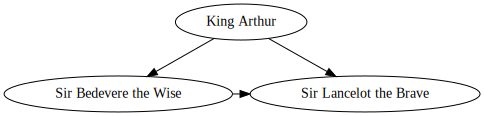

In [27]:
dot = graphviz.Digraph()
dot.node('A', 'King Arthur')  # doctest: +NO_EXE
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
dot

In [28]:
help(dot.node)

Help on method node in module graphviz.dot:

node(name: str, label: Optional[str] = None, _attributes=None, **attrs) -> None method of graphviz.graphs.Digraph instance
    Create a node.
    
    Args:
        name: Unique identifier for the node inside the source.
        label: Caption to be displayed (defaults to the node ``name``).
        attrs: Any additional node attributes (must be strings).



In [29]:
def builddot(atoms):
    dot = graphviz.Digraph()
    for x in atoms:
        if isarc(x):
            p = x.split(",")
            s1 = getsource(p)
            s2 = getsourcetxt(p)
            t1 = gettarget(p)
            t2 = gettargettxt(p)
            #print(t2)
            if "a" in s1:
                dot.node(s1, label=s2, style='filled', color='yellow', shape='box')
#                 n1 = s1 + " [label= " + s2 + ", style=filled, color = yellow, shape=box];\n"
                dot.node(t1, label=t2, style='filled', color='gray', shape='oval')
#                 n2 = t1 + " [label= " + t2 + ", style=filled, color = gray, shape=box];\n"
            else:
                dot.node(s1, label=s2, style='filled', color='gray', shape='oval')
#                 n1 = s1 + " [label= " + s2 + ", style=filled, color = gray, shape=box];\n"
                dot.node(t1, label=t2, style='filled', color='yellow', shape='box')
#                 n2 = t1 + " [label= " + t2 + ", style=filled, color = yellow, shape=box];\n"
#             e = s1 + " -> " + t1
            dot.edge(s1, t1)
#             mystring = mystring + n1 + n2 + e + ";\n"
#     mystring = mystring + "}\n"
    return dot


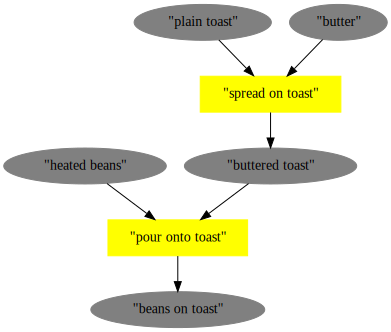

In [30]:
dot = builddot(atoms)
dot

In [31]:

lp_fnames = ["GraphRecipes.lp","ScratchExample.lp"]
lp_fnames = ["GraphRecipes.lp","SnacksOnToastExample.lp"]

In [32]:
ctl = clingo.Control()
for lp_fname in lp_fnames:
    ctl.load(lp_fname)
ctl.ground([("base", [])])
#answer_sets = []
result = ctl.solve(on_model=lambda m: print("Answer: {}".format(m)))

<cmd>: error: file could not be opened:
  GraphRecipes.lp



RuntimeError: parsing failed

In [ ]:
ctl = clingo.Control()
for lp_fname in lp_fnames:
    ctl.load(lp_fname)
ctl.ground([("base", [])])
models = []
with ctl.solve(yield_=True) as handle:
    for model in handle:
        models.append(model.symbols(shown=True))
models

In [ ]:
for atom in models[0]:
    print(f"atom.type = {atom.type}")
    if atom.type == symbol.SymbolType.Function:
        print(f"atom.name = {atom.name}")
        print(f"atom.arguments = {atom.arguments}")
        print(f"str(atom) = {str(atom)}")
        #print(f"atom.negative = {atom.negative}")
        #print(f"atom.number = {atom.number}")
        #print(f"atom.positive = {atom.positive}")
        #print(f"atom.string = {atom.string}")


In [ ]:
help(models[0][0])

In [ ]:
answer_sets[0].symbols(shown=True)

In [ ]:
help(answer_sets[0])

In [ ]:
help(result)

In [ ]:
help(ctl)

In [ ]:
# TO reproduce default clingo do this:
class Application:
    def __init__(self, name):
        self.program_name = name

    def main(self, ctl, files):
        if len(files) > 0:
            for f in files:
                ctl.load(f)
        else:
            ctl.load("-")
        ctl.solve()

        
        
clingo.clingo_main(Application(sys.argv[0]), sys.argv[1:])